In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    frame = cv2.imread('/Volumes/ExternalSSD/individualProject/rawImages/fmow_rgb_train_final/crop_field/crop_field_0/crop_field_0_9_rgb.jpg')

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")

    u_h = cv2.getTrackbarPos("UH", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    l_g = np.array([l_h,l_s,l_v])
    u_g = np.array([u_h,u_s,u_v])

    mask = cv2.inRange(hsv, l_g, u_g)

    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)

    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()

In [ ]:
#Segmentation for crop fields

import cv2
import numpy as np

# Load the image
image = cv2.imread('/Volumes/ExternalSSD/individualProject/rawImages/fmow_rgb_train_final/crop_field/crop_field_0/crop_field_0_9_rgb.jpg')

# Define the lower and upper bounds of the green color range in HSV space
lower_green = np.array([5, 20, 70])
upper_green = np.array([50, 115, 160])

# Convert the image to HSV space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a mask for the green color
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Apply morphological operations to remove noise and smooth the mask
kernel = np.ones((5, 5), np.uint8)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)

# Find contours in the mask
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding polygon for the largest contour in the green mask
if len(contours_green) > 0:
    largest_contour_green = max(contours_green, key=cv2.contourArea)
    epsilon = 0.02 * cv2.arcLength(largest_contour_green, True)
    approx = cv2.approxPolyDP(largest_contour_green, epsilon, True)

    # Draw the polygon on the image
    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)

    # Find the longest line in the bounding polygon
    line_length = 0
    for i in range(len(approx)):
        for j in range(i, len(approx)):
            dist = np.linalg.norm(approx[i][0] - approx[j][0])
            if dist > line_length:
                line_length = dist
                line_points = (approx[i][0], approx[j][0])

    # Draw the longest line on the image
    cv2.line(image, line_points[0], line_points[1], (0, 0, 255), 2)
    print(f"The length of the longest line in pixels is: {line_length}")

# Show the green mask for 3 seconds
cv2.imshow('Mask', mask_green)
cv2.waitKey(3000)

# Show the output image for 3 seconds
cv2.imshow('Output Image', image)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/Volumes/ExternalSSD/individualProject/rawImages/fmow_rgb_train_final/crop_field/crop_field_0/crop_field_0_9_rgb.jpg')

# Define the lower and upper bounds of the green color range in HSV space
lower_green = np.array([5, 20, 70])
upper_green = np.array([50, 115, 160])

# Convert the image to HSV space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a mask for the green color
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Apply morphological operations to remove noise and smooth the mask
kernel = np.ones((5, 5), np.uint8)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)

# Find contours in the mask
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding polygon for the largest and second largest contours in the green mask
if len(contours_green) > 0:
    contours_sorted = sorted(contours_green, key=cv2.contourArea, reverse=True)
    largest_contour_green = contours_sorted[0]
    second_largest_contour_green = contours_sorted[1] if len(contours_sorted) > 1 else None

    # Draw the polygon on the image for the largest contour
    epsilon = 0.02 * cv2.arcLength(largest_contour_green, True)
    approx_largest = cv2.approxPolyDP(largest_contour_green, epsilon, True)
    cv2.drawContours(image, [approx_largest], -1, (0, 255, 0), 2)

    # Find the longest line in the bounding polygon for the largest contour
    line_length = 0
    for i in range(len(approx_largest)):
        for j in range(i, len(approx_largest)):
            dist = np.linalg.norm(approx_largest[i][0] - approx_largest[j][0])
            if dist > line_length:
                line_length = dist
                line_points = (approx_largest[i][0], approx_largest[j][0])

    # Draw the longest line on the image for the largest contour
    cv2.line(image, line_points[0], line_points[1], (0, 0, 255), 2)
    print(f"The length of the longest line in pixels is: {line_length}")

    # Draw the polygon on the image for the second largest contour
    if second_largest_contour_green is not None:
        epsilon = 0.02 * cv2.arcLength(second_largest_contour_green, True)
        approx_second = cv2.approxPolyDP(second_largest_contour_green, epsilon, True)
        cv2.drawContours(image, [approx_second], -1, (255, 0, 0), 2)

        # Find the longest line in the bounding polygon for the second largest contour
        line_length_second = 0
        for i in range(len(approx_second)):
            for j in range(i, len(approx_second)):
                dist = np.linalg.norm(approx_second[i][0] - approx_second[j][0])
                if dist > line_length_second:
                    line_length_second = dist
                    line_points_second = (approx_second[i][0], approx_second[j][0])

        # Draw the longest line on the image for the second largest contour
        if line_length_second > 0:
            cv2.line(image, line_points_second[0], line_points_second[1], (0, 0, 255), 2)
            print(f"The length of the longest line in pixels for the second largest contour is: {line_length_second}")

# Show the green mask for 3 seconds
cv2.imshow('Mask', mask_green)
cv2.waitKey(3000)

# Show the output image for 3 seconds
cv2.imshow('Output Image', image)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

# Function to check if all points of a rectangle are inside a polygon
def are_all_points_inside_polygon(points, polygon):
    return all(cv2.pointPolygonTest(polygon, (int(point[0]), int(point[1])), False) >= 0 for point in points)

def calculate_rectangle_along_line(p1, p2, rect_length, rect_width):
    # Convert points to numpy arrays for easier calculations
    p1 = np.array(p1, dtype=np.float32)
    p2 = np.array(p2, dtype=np.float32)
    
    # Calculate the midpoint of the longest line
    midpoint = (p1 + p2) / 2
    
    # Calculate the direction vector from p1 to p2 and normalize it
    dir_vector = p2 - p1
    dir_vector_norm = dir_vector / np.linalg.norm(dir_vector)
    
    # Calculate points along the longest line at specified rectangle length
    half_length = rect_length / 2
    point_on_line_a = midpoint - dir_vector_norm * half_length
    point_on_line_b = midpoint + dir_vector_norm * half_length
    
    # Calculate the perpendicular direction vector
    perp_vector = np.array([-dir_vector_norm[1], dir_vector_norm[0]])
    
    # Calculate the width offset from the line to get rectangle corners
    half_width = rect_width / 2
    corner1 = point_on_line_a + perp_vector * half_width
    corner2 = point_on_line_a - perp_vector * half_width
    corner3 = point_on_line_b - perp_vector * half_width
    corner4 = point_on_line_b + perp_vector * half_width
    
    return np.array([corner1, corner2, corner3, corner4], dtype=np.int32)

# Load the image
image = cv2.imread('/Volumes/ExternalSSD/individualProject/rawImages/fmow_rgb_train_final/crop_field/crop_field_0/crop_field_0_9_rgb.jpg')

# Define the lower and upper bounds of the green color range in HSV space
lower_green = np.array([5, 20, 70])
upper_green = np.array([50, 115, 160])

# Convert the image to HSV space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a mask for the green color
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Apply morphological operations to remove noise and smooth the mask
kernel = np.ones((5, 5), np.uint8)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)

# Find contours in the mask
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding polygon for the largest and second largest contours in the green mask
if len(contours_green) > 0:
    contours_sorted = sorted(contours_green, key=cv2.contourArea, reverse=True)
    largest_contour_green = contours_sorted[0]
    second_largest_contour_green = contours_sorted[1] if len(contours_sorted) > 1 else None

    # Draw the polygon on the image for the largest contour
    epsilon = 0.02 * cv2.arcLength(largest_contour_green, True)
    approx_largest = cv2.approxPolyDP(largest_contour_green, epsilon, True)
    cv2.drawContours(image, [approx_largest], -1, (0, 255, 0), 2)

    # Find the longest line in the bounding polygon for the largest contour
    line_length = 0
    for i in range(len(approx_largest)):
        for j in range(i, len(approx_largest)):
            dist = np.linalg.norm(approx_largest[i][0] - approx_largest[j][0])
            if dist > line_length:
                line_length = dist
                line_points = (approx_largest[i][0], approx_largest[j][0])

    # Draw the longest line on the image for the largest contour
    cv2.line(image, line_points[0], line_points[1], (0, 0, 255), 2)
    print(f"The length of the longest line in pixels is: {line_length}")

    # Draw the polygon on the image for the second largest contour
    if second_largest_contour_green is not None:
        epsilon = 0.02 * cv2.arcLength(second_largest_contour_green, True)
        approx_second = cv2.approxPolyDP(second_largest_contour_green, epsilon, True)
        cv2.drawContours(image, [approx_second], -1, (0, 255, 0), 2)

        # Find the longest line in the bounding polygon for the second largest contour
        line_length_second = 0
        for i in range(len(approx_second)):
            for j in range(i, len(approx_second)):
                dist = np.linalg.norm(approx_second[i][0] - approx_second[j][0])
                if dist > line_length_second:
                    line_length_second = dist
                    line_points_second = (approx_second[i][0], approx_second[j][0])

        # Draw the longest line on the image for the second largest contour
        if line_length_second > 0:
            cv2.line(image, line_points_second[0], line_points_second[1], (0, 0, 255), 2)
            print(f"The length of the longest line in pixels for the second largest contour is: {line_length_second}")

# Specify rectangle dimensions (modify these as needed)
rectangle_length = 760  # Length along the longest line
rectangle_width = 74   # Width perpendicular to the longest line

for polygon in [approx_largest, approx_second]:
    if polygon is not None:
        # Calculate the longest line, its midpoint, and then the rectangle
        # Assuming you have line_points and line_length as before
        rect_corners = calculate_rectangle_along_line(line_points[0], line_points[1], rectangle_length, rectangle_width)
        
        # Ensure the rectangle is fully within the polygon
        if are_all_points_inside_polygon(rect_corners, polygon):
            # The rectangle is within the polygon, draw it
            cv2.polylines(image, [rect_corners], isClosed=True, color=(255, 255, 0), thickness=2)
            print("Rectangle successfully drawn within the polygon.")
        else:
            print("Unable to fit the rectangle within the polygon boundaries.")

# Display the final image with rectangles (if drawn)
cv2.imshow('Output Image with Rectangles', image)
cv2.imwrite('GeometryVsPolygon.jpg', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

The length of the longest line in pixels is: 1141.0609098553855
The length of the longest line in pixels for the second largest contour is: 734.3582232126225
Rectangle successfully drawn within the polygon.
Unable to fit the rectangle within the polygon boundaries.


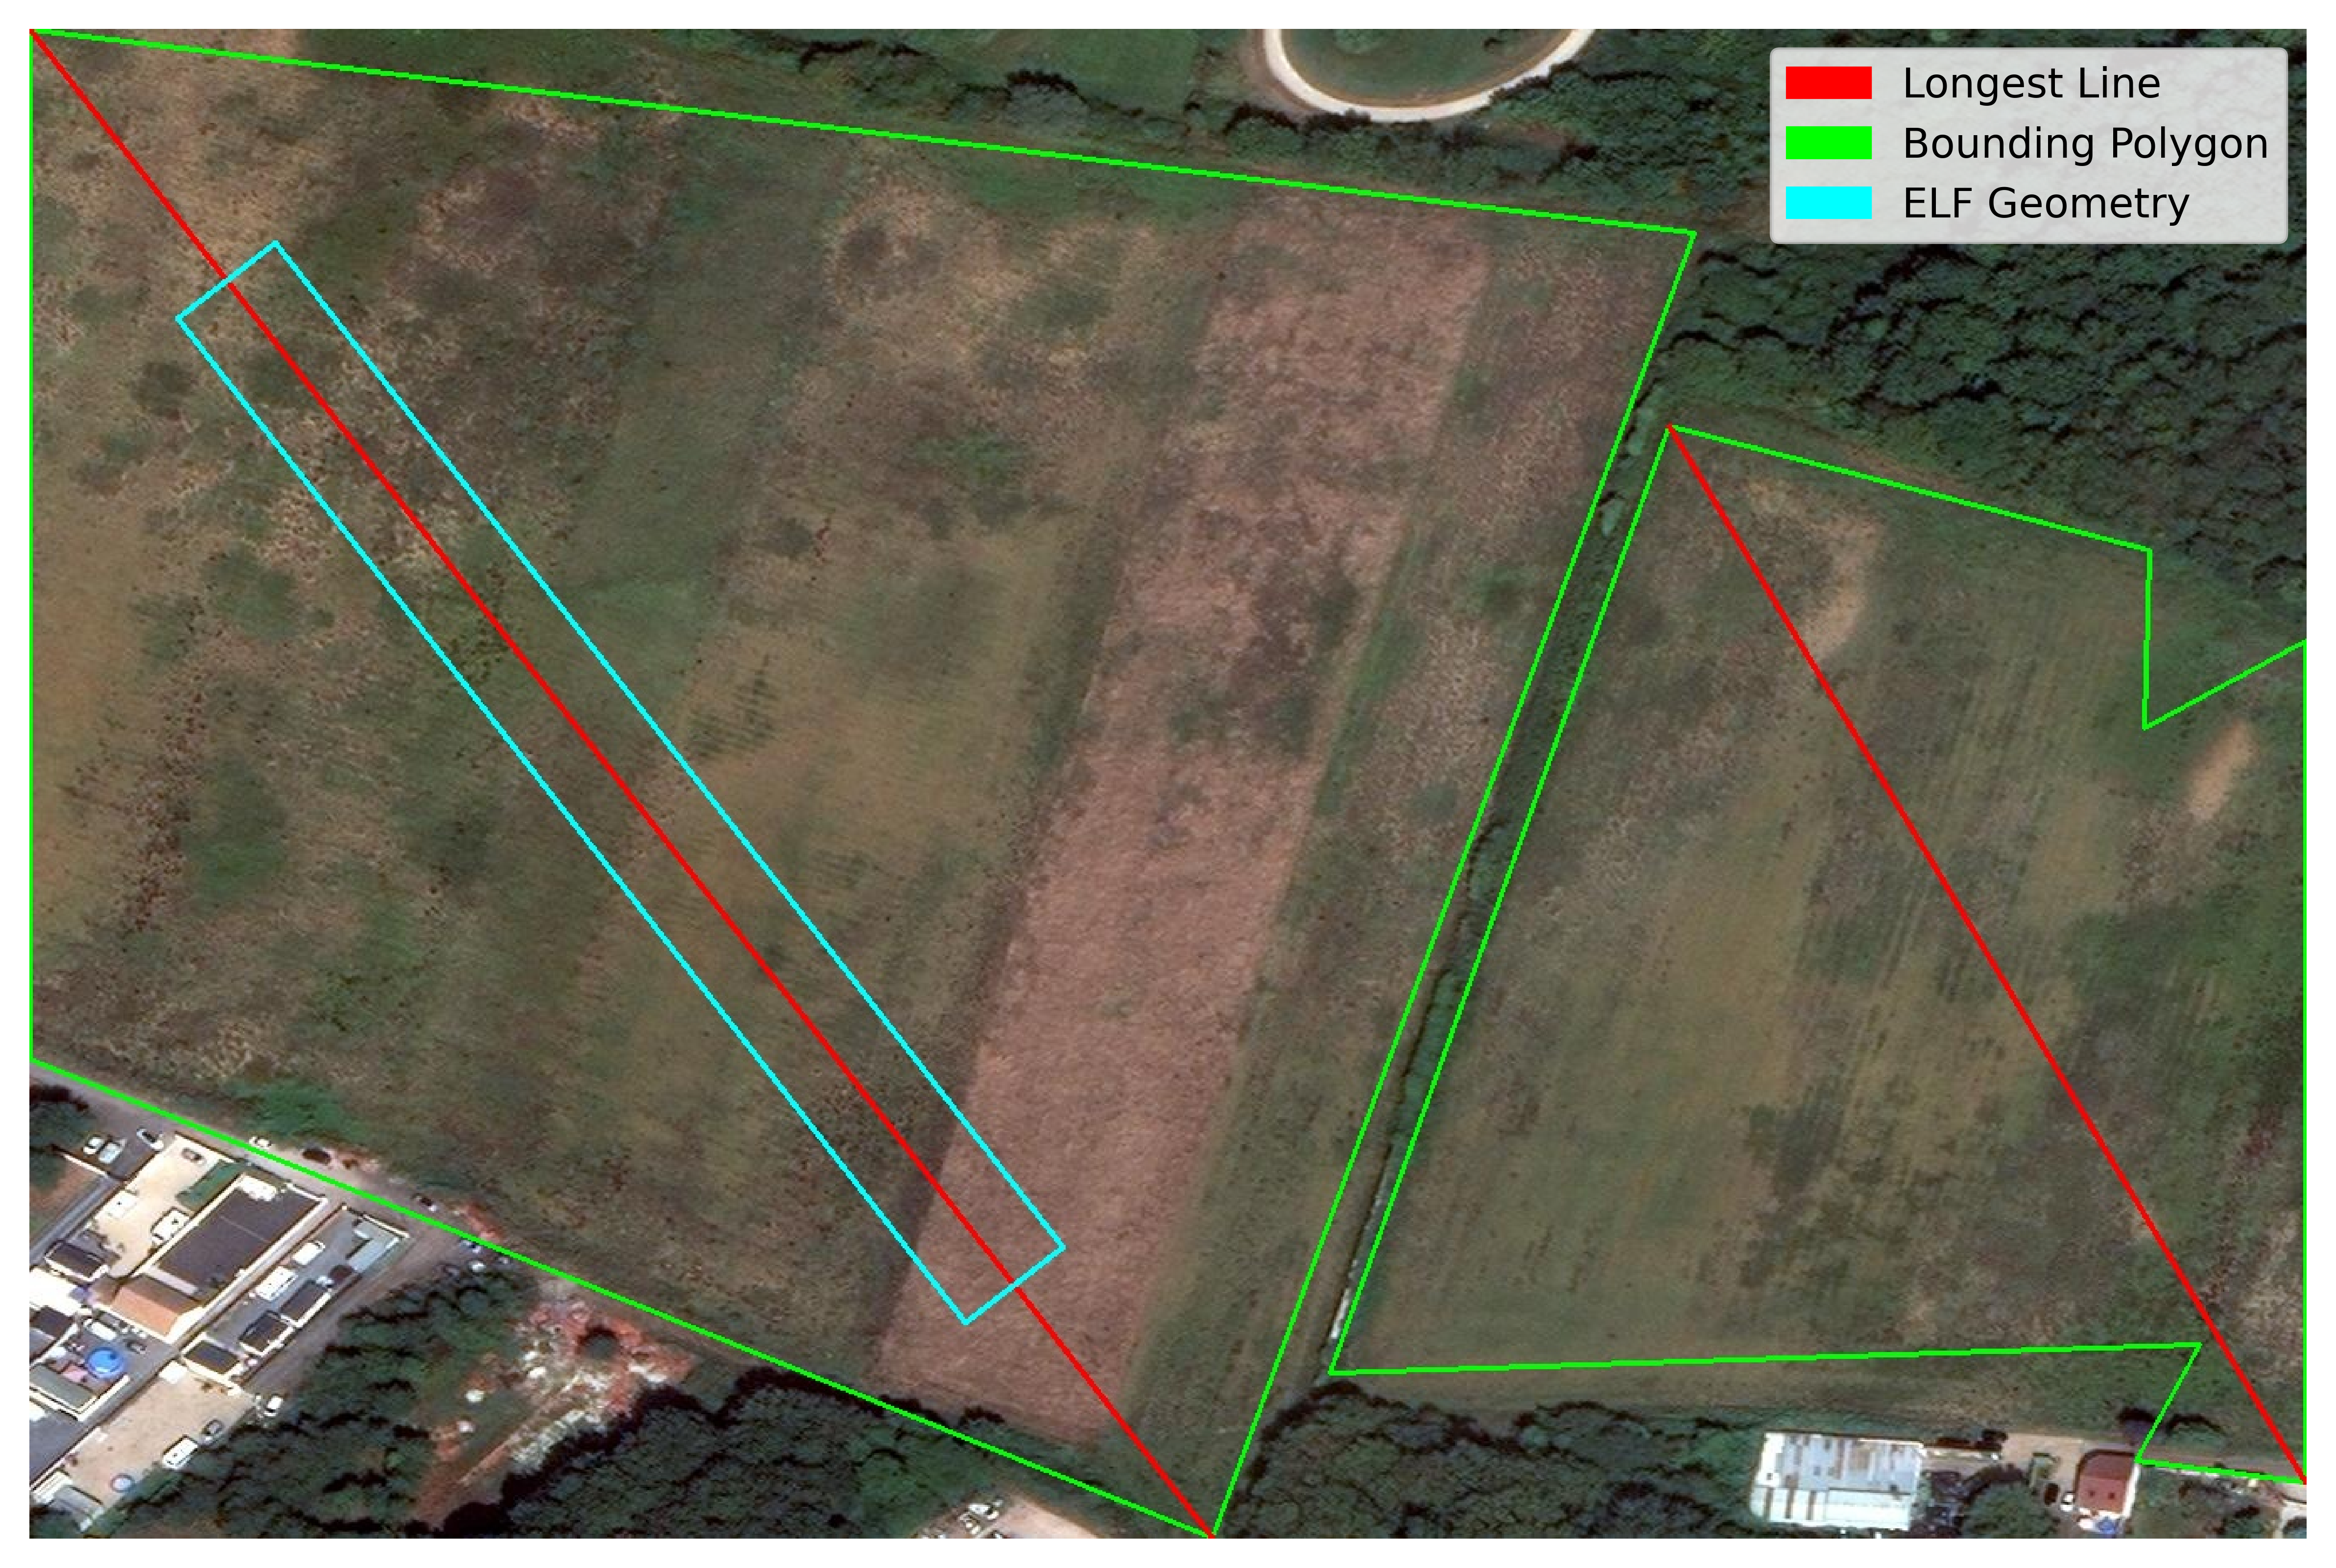

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the modified image
image = plt.imread('GrassGeometryVsPolygon1.jpg')

# Display the image
plt.figure(figsize=(10,8), dpi=600)
plt.imshow(image)

# Create legend handles
red_line = mpatches.Patch(color=(1,0,0), label='Longest Line')
green_polygon = mpatches.Patch(color=(0,1,0), label='Bounding Polygon')
yellow_rectangle = mpatches.Patch(color=(0,1,1), label='ELF Geometry')

# Create and position the legend
plt.legend(handles=[red_line, green_polygon, yellow_rectangle], loc='upper right')

# Remove axes and show the plot
plt.axis('off')
plt.show()